# Exercise 5: Random Forest
Author: Allyson Vasquez  
  
Prompt: Develop a Simple Random Forest Model from Scratch.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank_marketing.csv')

## A.) Look into and download the data set bank marketing.zip and understand the content.  
Use y (whether a client will subscribe to a term deposit or not) and others as x variables (there are 15 of them).

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
1,27,unemployed,married,primary,no,7459,yes,no,unknown,9,may,407,2,-1,0,unknown,no
2,59,management,divorced,primary,no,13308,yes,no,unknown,13,may,131,1,-1,0,unknown,no
3,48,technician,married,secondary,no,7373,yes,no,unknown,14,may,126,1,-1,0,unknown,no
4,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35134 entries, 0 to 35133
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        35134 non-null  int64 
 1   job        35134 non-null  object
 2   marital    35134 non-null  object
 3   education  35134 non-null  object
 4   default    35134 non-null  object
 5   balance    35134 non-null  int64 
 6   housing    35134 non-null  object
 7   loan       35134 non-null  object
 8   contact    35134 non-null  object
 9   day        35134 non-null  int64 
 10  month      35134 non-null  object
 11  duration   35134 non-null  int64 
 12  campaign   35134 non-null  int64 
 13  pdays      35134 non-null  int64 
 14  previous   35134 non-null  int64 
 15  poutcome   35134 non-null  object
 16  y          35134 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.6+ MB


This is a large dataset of ~35,000 records of clients with attributes relating to a clients basic information relevant for this bank. The dataset contains 17 attributes per person in this sample population.  

`y` is our target label of if a client ended up subscribing to a term deposit or not. 

Below explores more about the other `x` attributes.

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# the average age of a client is around 40-41 years old
df.age.describe()

count    35134.000000
mean        40.857062
std         10.594897
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [7]:
# clients who did not sub to a term deposit vs. those that did
y_counts = df['y'].value_counts()
y_counts

no     31005
yes     4129
Name: y, dtype: int64

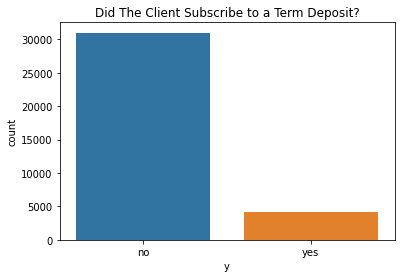

In [8]:
# visualizing the target label
plt.figure()
sns.countplot(x='y', data=df)
plt.title("Did The Client Subscribe to a Term Deposit?")

labels =df['y'].value_counts(sort = True).index
sizes = df['y'].value_counts(sort = True)

plt.show()

## B.) Identify several independent variables (x) that you think are important, say K = 5 or more, but no more than 10.  
To do this you may exercise your intuitive judgment, run a logistic regression model, or whatever supports your choice.  
(Our objective is to develop a simple model at this point, not necessarily a good one.)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
categorical = df.select_dtypes(include='object')
categorical.head(2)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,unemployed,married,primary,no,yes,no,unknown,may,unknown,no


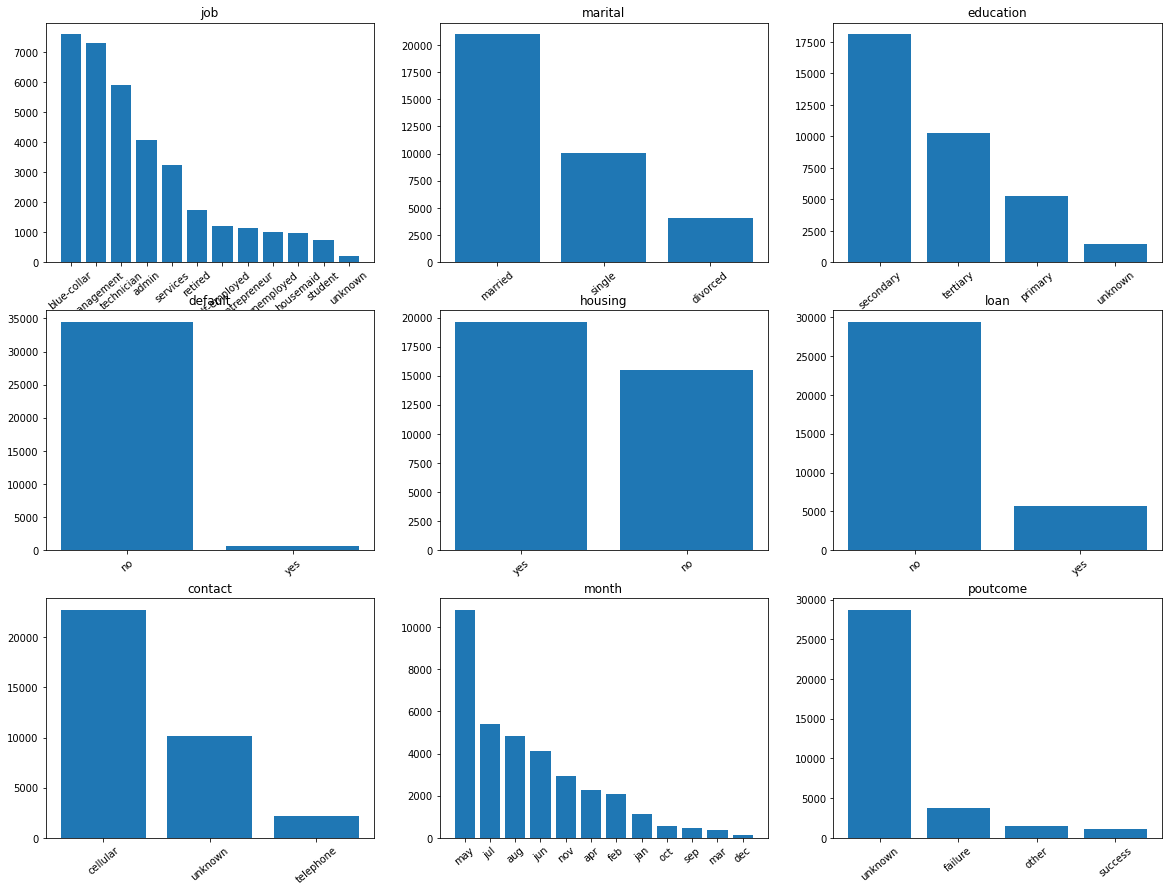

In [11]:
# visualizing value counts for all categorical attributes
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

c = 0
for col in categorical_cols:
    value_counts = df[col].value_counts() #iterate through each attribute
    # setting up 3x3 subplots
    trace_x = c // 3
    trace_y = c % 3
    x_pos = np.arange(0, len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index) # set up x,y labels
    axs[trace_x, trace_y].set_title(col) # set up title
    for tick in axs[trace_x, trace_y].get_xticklabels(): #rotate label names 40 degrees
        tick.set_rotation(40)
    c += 1
plt.show()

In [12]:
numerical = df.select_dtypes(include='int64')
numerical.head(2)

,age,balance,day,duration,campaign,pdays,previous
0,51,6530,5,91,1,-1,0
1,27,7459,9,407,2,-1,0


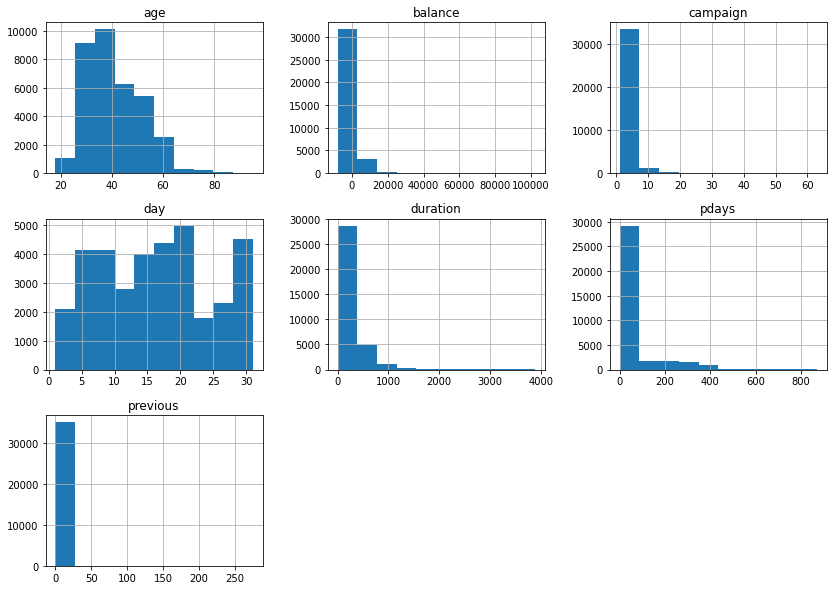

In [13]:
# visualizing value counts for all numerical attributes
numerical.hist(bins=10, figsize=(14,10))
plt.show()

In [14]:
numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,35134.000000,35134.000000,35134.000000,35134.000000,35134.000000,35134.000000,35134.000000
mean,40.857062,1151.503102,15.779074,259.112512,2.747823,40.372431,0.577731
std,10.594897,2839.332249,8.341386,257.764233,3.048390,100.695254,2.375666
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,419.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1291.000000,21.000000,321.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,63.000000,871.000000,275.000000


`campaign`, `pdays` and `previous` have some outliers. We can tell because mean values are sensitive to outliers. For for all 3 of these attributes, the mean values are very small for these three attributes compared to their max value, which indicates outliers for these fields.

We can break down the categorical attributes to see if there are any correlations with certain attributes and whether or not a client subsribes to a term deposit.

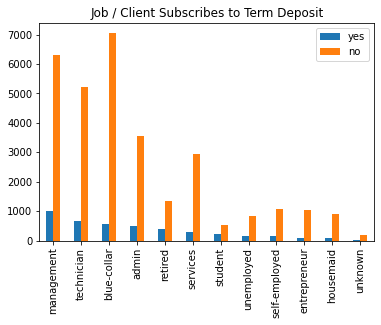

In [21]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['job'].value_counts()
cat_df.plot.bar(title = 'Job / Client Subscribes to Term Deposit')

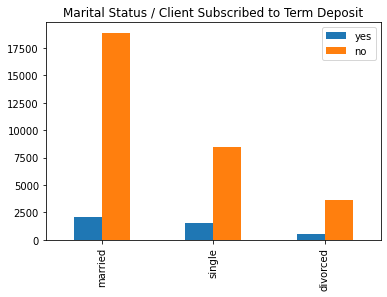

In [23]:
#job and y
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['marital'].value_counts()
cat_df.plot.bar(title = 'Marital Status / Client Subscribed to Term Deposit')

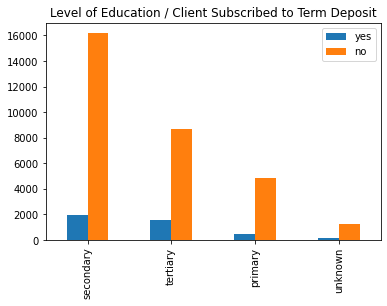

In [24]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['education'].value_counts()
cat_df.plot.bar(title = 'Level of Education / Client Subscribed to Term Deposit')

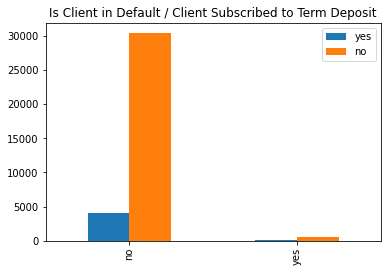

In [25]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['default'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['default'].value_counts()
cat_df.plot.bar(title = 'Is Client in Default / Client Subscribed to Term Deposit')

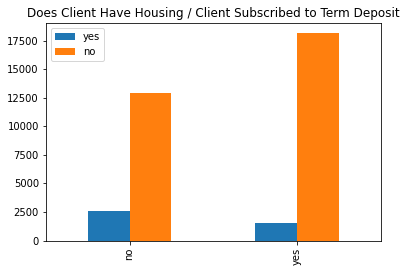

In [26]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['housing'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['housing'].value_counts()
cat_df.plot.bar(title = 'Does Client Have Housing / Client Subscribed to Term Deposit')

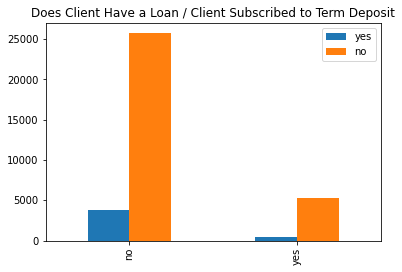

In [27]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['loan'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['loan'].value_counts()
cat_df.plot.bar(title = 'Does Client Have a Loan / Client Subscribed to Term Deposit')

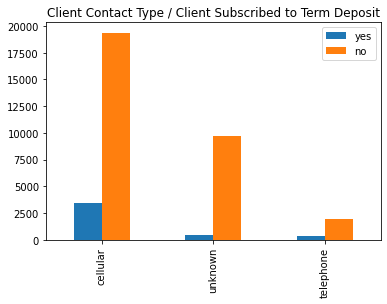

In [29]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['contact'].value_counts()
cat_df.plot.bar(title = 'Client Contact Type / Client Subscribed to Term Deposit')

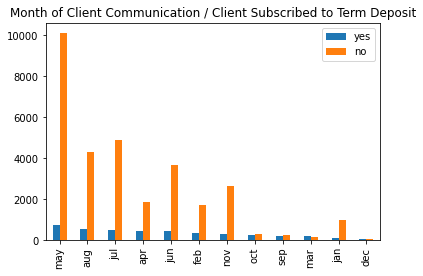

In [30]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['month'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['month'].value_counts()
cat_df.plot.bar(title = 'Month of Client Communication / Client Subscribed to Term Deposit')

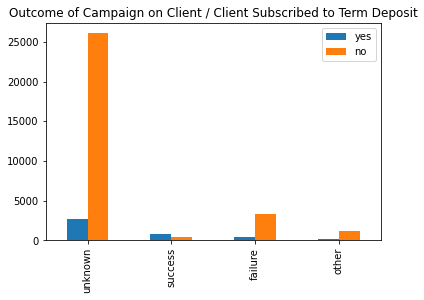

In [33]:
cat_df = pd.DataFrame()
cat_df['yes'] = df[df['y'] == 'yes']['poutcome'].value_counts()
cat_df['no'] = df[df['y'] == 'no']['poutcome'].value_counts()
cat_df.plot.bar(title = 'Outcome of Campaign on Client / Client Subscribed to Term Deposit')

Based on this information, I think the most important information lies in:
`balance` - Account balance of client
`age` - Age of client
Number of contacts performed during this campaign and contact duration,
Number of contacts performed before this campaign.

## C.) Clean up the data, by deletion, imputation, and/or transformation of some kind. You want record what you do.

The first step to prep the dataset for classification modeling is to make sure all attributes are converted to 0,1 values, and changing yes/no attributes to boolean data type.


In [35]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no


In [38]:
'''    
OUTPUT
df - cleaned dataset:
1. columns with 'yes' and 'no' values are converted into boolean variables;
2. categorical columns are converted into dummy variables;
3. drop irrelevant columns.
4. impute incorrect values
'''
def convert_to_boolean(row, column_name):
    if row[column_name] == 'yes':
        return 1 #replace yes with 1
    else:
        return 0 #replace no with 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

cleaned_df = df.copy()

#convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
bool_columns = ['default', 'housing', 'loan', 'y']

for bool_col in bool_columns:
    cleaned_df[bool_col] = df.apply(lambda row: convert_to_boolean(row, bool_col),axis=1)

cleaned_df = cleaned_df.drop(columns = bool_columns)

#break down each categorical attribute into columns
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in  cat_columns:
    cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_', 
                                                                        drop_first=True, dummy_na=False)], axis=1)

#drop irrelevant columns
cleaned_df = cleaned_df.drop(columns = ['pdays'])

#impute incorrect values and drop original columns
cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)

cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
cleaned_df

,age,balance,day,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,51,6530,5,91,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,27,7459,9,407,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0
2,59,13308,13,131,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,48,7373,14,126,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,51,7180,14,927,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35129,51,825,17,977,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,3.0,0.0
35130,71,1729,17,456,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,2.0,0.0
35131,72,5715,17,1127,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,5.0,3.0
35132,57,668,17,508,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,4.0,0.0
